# Real Estate Sales in Melbourne
### The notebook of this project is an analysis of the database of real estate sales in Melbourne from 2016 to 2017. The features of the dataset includes Address, Type of Real Estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale, Distance from CBD, Land Size, Building Size and Number of Properties that exist in each suburb. The amount of data in this database has certain limitations, with less data available for the first quarter of 2016 and the fourth quarter of 2017. Despite the limitations above, other data volumes are very detailed and easy to analyze.
### For most stakeholders, the main concern is the price, so my first point is mainly to analyze which features will affect the housing price. 
Types: Unit,House and Townhouse.
* The price distribution of different types of housing.

Suburbs: With distance and directions from CBD.
* The price distribution of different suburbs.

Rooms: With number of bedrooms,bathrooms and carports.
* The price distribution of number of rooms.


According to the data, I predict that the house price is mainly affected by the type of property. House is the most expensive, townhouse is the second, and unit is the cheapest. Secondly, in the case of the same type of house, the suburb where the house is located is a key factor in determining the property price. Finally, when the conditions of the first two features are the same, what determines the real estate price is the number of houses.

### Secondly, I will further summarize the real estate in Melbourne from 2016 to 2017.
* Which types of property have sold the most?
* Which sales method is easy to make deal？
* Which month sold the most in 2016 or 2017?
* Top 10 suburbs with highest sales.
* The correlation between built year and property price
* The correlation between land size and property price.


# Data Overview

In [2]:
#import packages
import pandas as pd  
import numpy as np
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Desktop/melb_data.csv')
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Sold_year'] = pd.DatetimeIndex(df['Date']).year
df['Sold_month'] = pd.DatetimeIndex(df['Date']).month
df.drop(columns = ['Date'], inplace = True)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Sold_year,Sold_month
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067,2,...,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,2016,3
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067,2,...,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,2016,4
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067,3,...,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,2017,4
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2.5,3067,3,...,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,2017,4
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2.5,3067,3,...,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,2016,4


In [8]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Sold_year           0
Sold_month          0
dtype: int64

<AxesSubplot:xlabel='CouncilArea', ylabel='Count'>

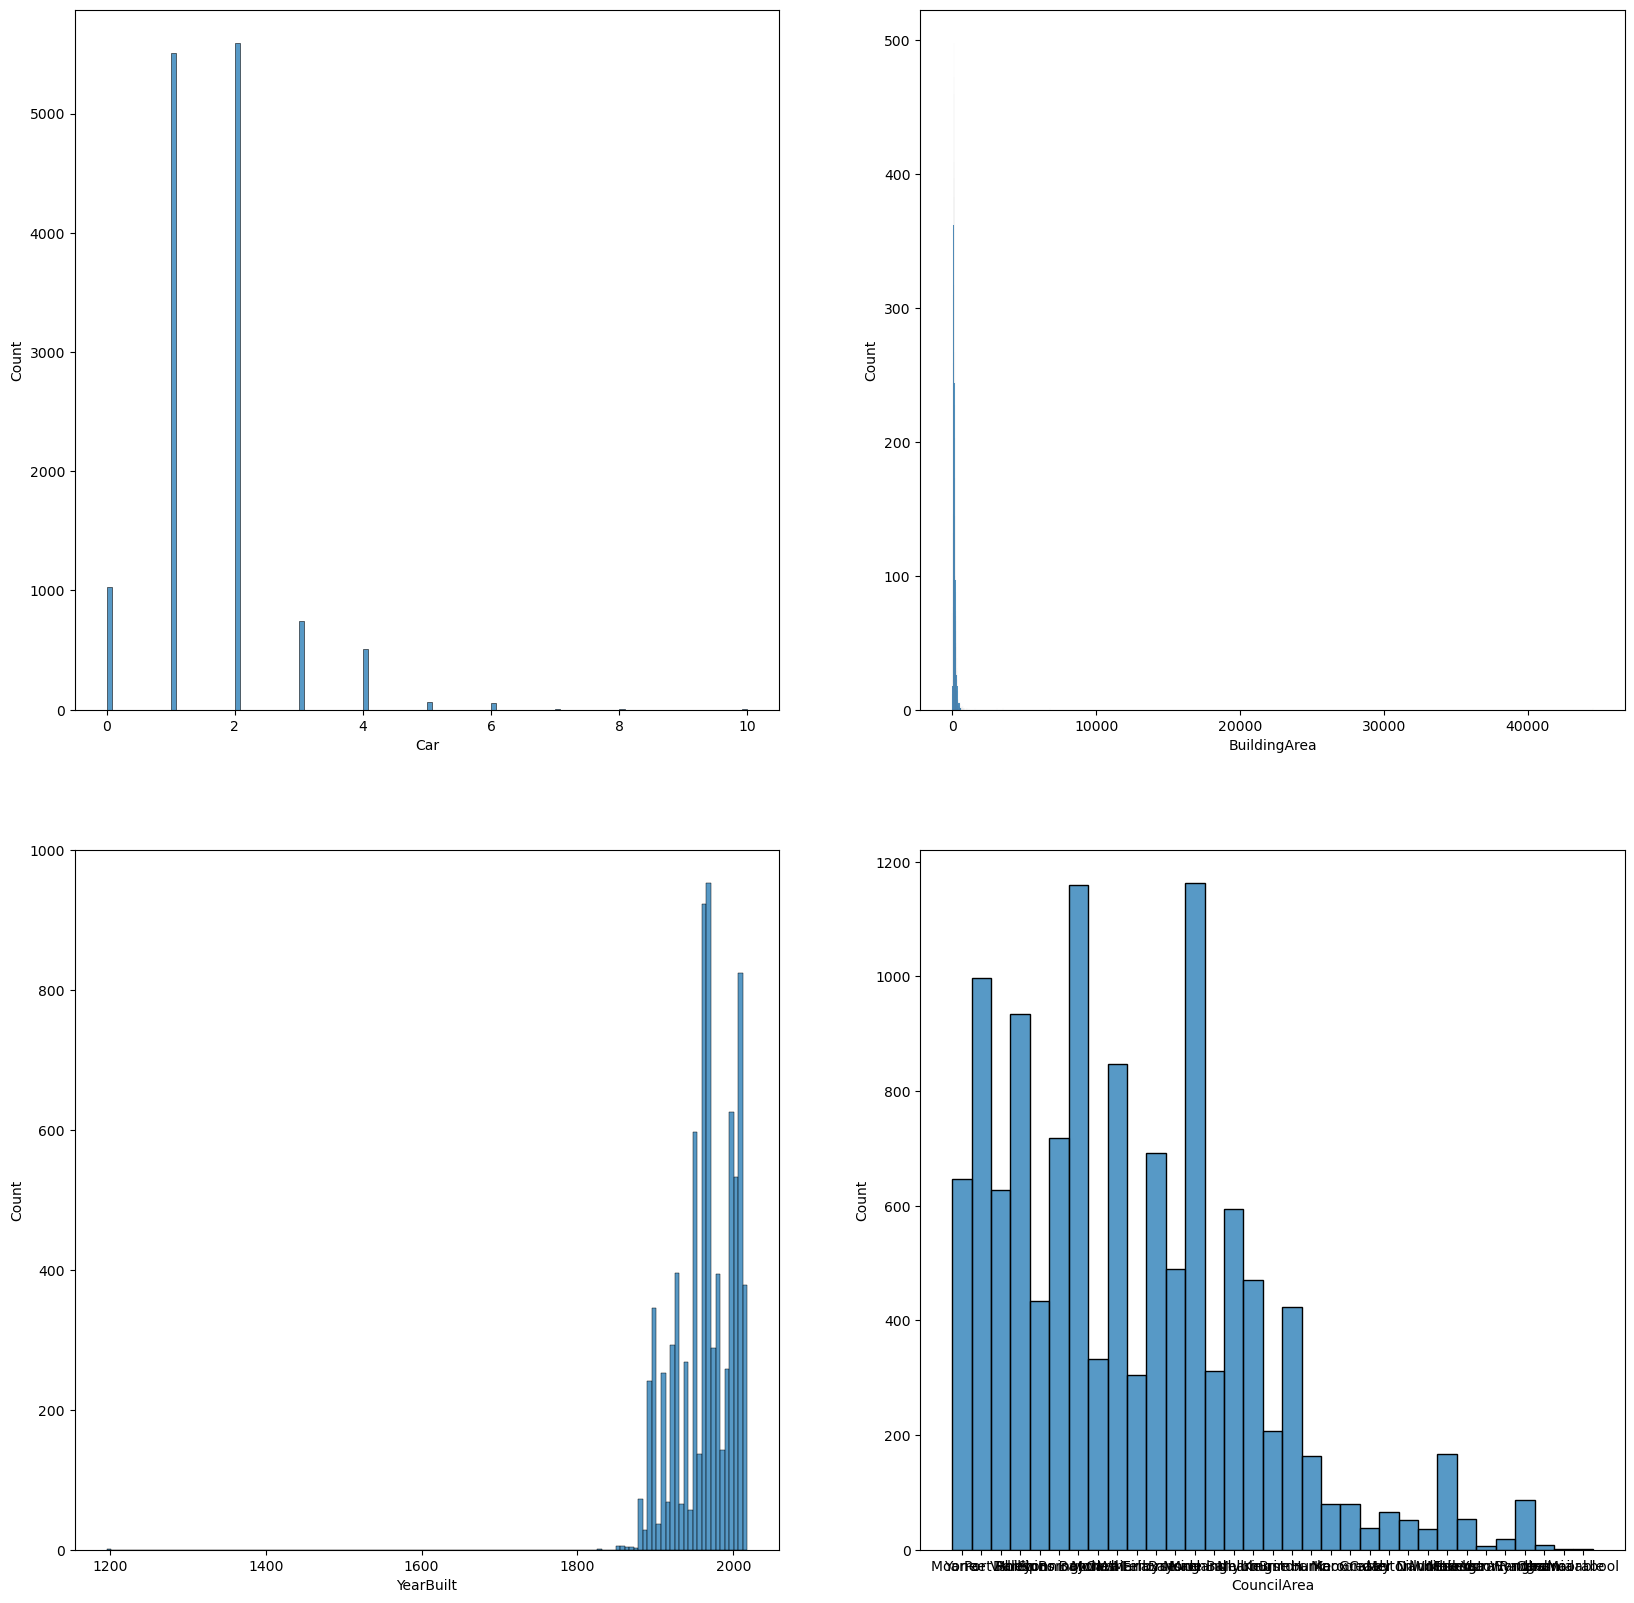

In [12]:
fig, axs = plt.subplots (nrows=2, ncols=2, figsize=(20, 20))
sns.histplot((df['Car']), ax = axs [0][0])
sns.histplot((df['BuildingArea']), ax = axs [0][1])
sns.histplot((df['YearBuilt']), ax = axs [1][0])
sns.histplot((df['CouncilArea']), ax = axs [1][1])
#plt.xticks(rotation = 90)?

In [ ]:
df['Car'] = df['Car'].fillna(df['Car'].mean()).astype(int)
df['BuildingArea'] = df['BuildingArea'].fillna('unknown')
df['YearBuilt'] = df['YearBuilt'].fillna('unknown')
#df['CouncilArea'] = df['CouncilArea'].fillna(?)